##### We will build a linear regression model that predicts Medical Cost for Health Insurance. Dataset consists of the following independent variables:
1. Region
2. Age
3. Sex
4. BMI
5. Children
6. Smoker

The **charge** column is our dependent variable

# Definition and Modelling
Linear Regression is a supervised learning model used to predict a continous value. The goal of linear regression is to minimize the mean error estimate of our fit line. The error as we know is the distance between the fit line (predicted value) and the data points. 

We also know that we find the fit line by getting  the best Regression coefficients and intercept (if simple linear) and Coefficients (if multiple linear).

## Hypothesis Representation

Through General Knowledge though, we know that in a problem such as this, there could be multiple determinants for our dependent value, in this case the Charge. So we'll be using the Multiple Linear Regression model that estimate our relationships and predict our dependent variable (charge).

Multiple Linear Regression is just an extension of the simple linear regression in terms of how we train our model. Key difference here is that for multiple linear regression, we try estimate the coefficients for each independent variable. We do this using Ordinary least squares **(OLS)** which tries to estimate the coefficients by minimizing the Mean Square Error (MSE).

In a simple linear equation, we know that we can get the values of our fit line or predictions using the equation of a line $y = mx + c$, where $y$ is the dependent variable, $m$ is the slope, $x$ is the independent vatiable and **c** the intercept.

In Simple Linear Regression, we represent this as:

$$y = \theta_0 + \theta_1X_i$$

Where $y$ is the dependent variable, $\theta_0$ is the intercept and $\theta_i$ is the coefficient of the fit line (slope or gradient) and $X_i$ is the independent variable.

Like we said earlier, multiple linear regression is just an extension of the simple linear linear regression. Here, we use multiple independent variables to get our dependent variables. This is represented mathematically as:

$$y = \theta_0 + \theta_1X_1 + \theta_2X_2 + \theta_3X_3 + ..... + \theta_nX_n$$

Where $y$ is the dependent variable, $\theta_0$ is the intercept, $\theta_1 ..... \theta_n$ are the Coefficients of each independent variable and $X_1..........X_n$ are the independent variables.

### Import Libraries and Dataset
Let's import all the necessary libraries and dataset for analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

med_df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

print(med_df.shape)
med_df.head()

/kaggle/input/insurance/insurance.csv
(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The shape indicates that we have **1333** observations or records in our dataset and **7** variables, 6 independent variables (age, sex, bmi, children, smoker, region) and 1 dependent variable - **charges**.

Text(0.5, 0.98, 'Charge VS BMI')

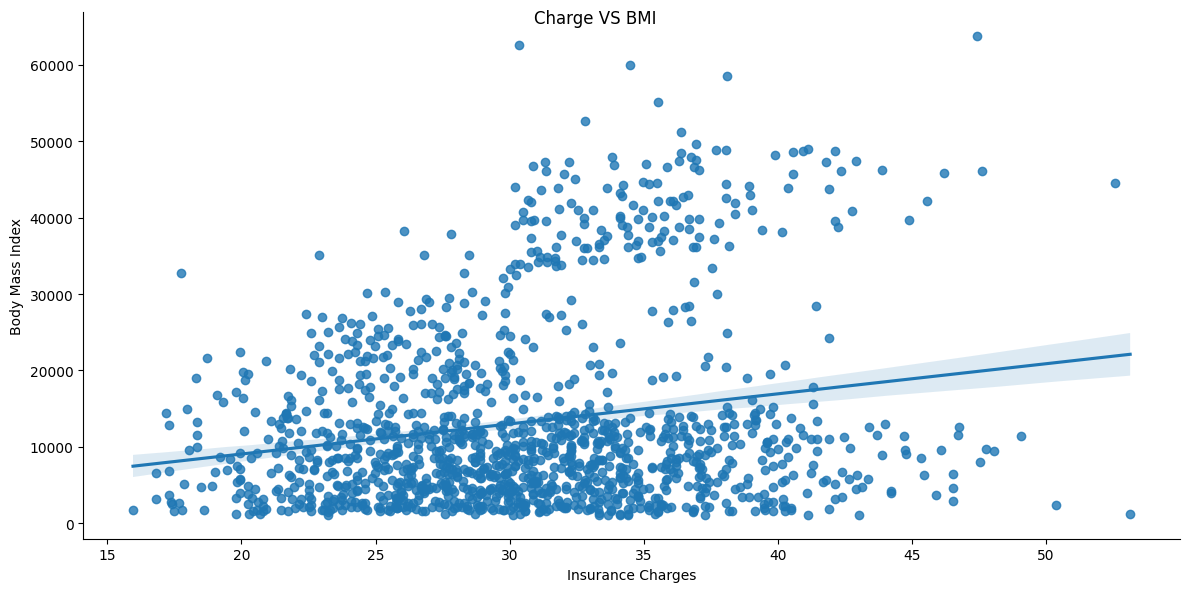

In [3]:
"""
Let's visualize our variable relationship using a seaborn library
lmplot using bmi as the independent variable and charges as the dependent variable.
The lmplot is a scatter plot overlaid with regression line. used to understand
the relationship between multiple variables within subsets of a dataset.
"""

g = sns.lmplot(x="bmi", y="charges", data=med_df, aspect=2, height=6)
g.set(xlabel="Insurance Charges", ylabel="Body Mass Index")
g.fig.suptitle("Charge VS BMI")

#### Exploratory Analysis

In [4]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
med_df[med_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
med_df.drop_duplicates(inplace=True)

In [8]:
med_df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

#### Plots

/tmp/ipykernel_20/319797664.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = med_df.corr()


<AxesSubplot: >

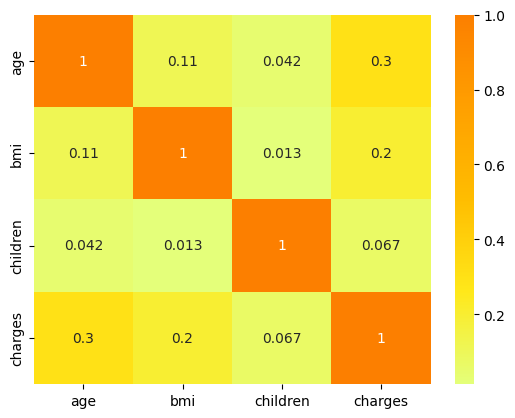

In [9]:
# Correlation plot
corr = med_df.corr()
sns.heatmap(corr, cmap = "Wistia", annot=True)

Seems there's no correlation among our variables

##### Let's try to understand the behaviour of our target variable. ( This is key to accurately predicting a dependent variable)
**Side Note: ** Any variable that exibhits normal ditribution is feasible to be forcasted with higher accuracy

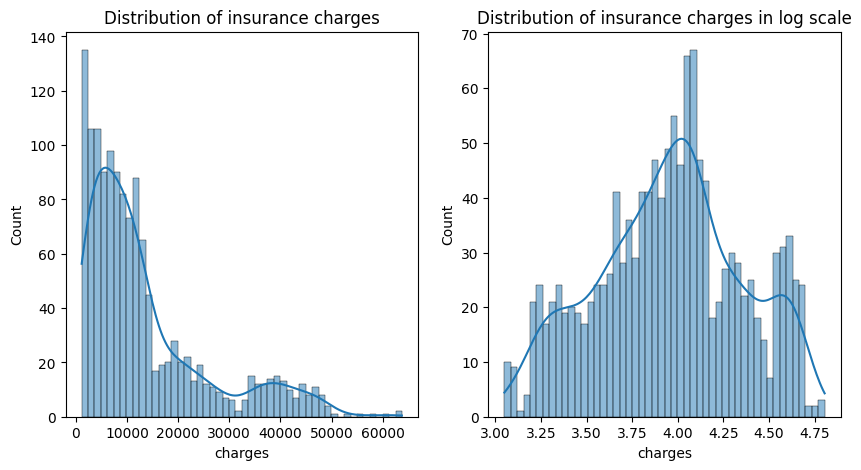

In [10]:
# Let's look at the distribution of our dependent variable (charges)
fig, ax = plt.subplots(1,2)

g = sns.histplot(med_df['charges'], bins=50, kde=True, ax=ax[0])
g.set(title="Distribution of insurance charges")

f = sns.histplot(np.log10(med_df['charges']), bins=50, kde=True, ax=ax[1])
f.set(title="Distribution of insurance charges in log scale")

fig.set_size_inches([10,5])

The distribution of charges as displayed in the left plot is right skewed. In the right however, we apply natural log which makes the plot apporxoimately tend to a normal distribution. For further analysis, we will apply log on target variable charges

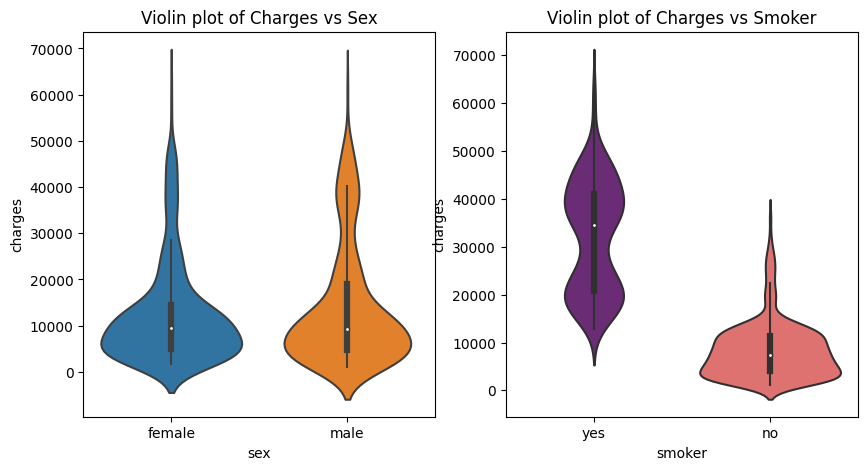

In [11]:
fig, ax = plt.subplots(1,2)

g = sns.violinplot(x="sex", y="charges", data=med_df, ax=ax[0])
g.set(title="Violin plot of Charges vs Sex")

f = sns.violinplot(x="smoker", y="charges", data=med_df, ax=ax[1], palette='magma')
f.set(title="Violin plot of Charges vs Smoker")

fig.set_size_inches([10,5])

From the left plot, we can see that the average amount paid by both sexes centers around the same amount. In the right plot however, the charges paid by smokers is much wide range compared to non-smokers. The average charges for non-smokers is about $5000 which is the minimum amount for smokers. Interesting

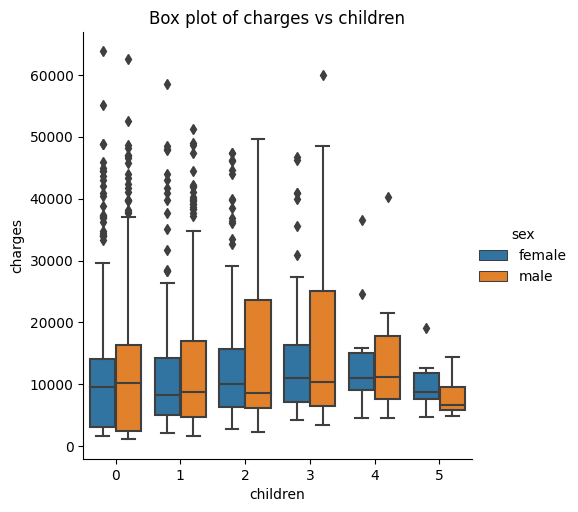

In [12]:
g = sns.catplot(x="children", y="charges", hue="sex", kind="box", data=med_df)
g.set(title="Box plot of charges vs children")
fig.set_size_inches([5,10])

In [13]:
med_df.groupby('children')['charges'].agg(['mean','min',max])

,mean,min,max
children,,,
0,12384.695344,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


We can see that from our plots and estimates, while the minimum insurance cost for each category looks linear, the insurance charges are really not affected by the number of kids an individual has or the sex of the child.

[Text(0.5, 1.0, 'Violin plot of Charges vs children')]

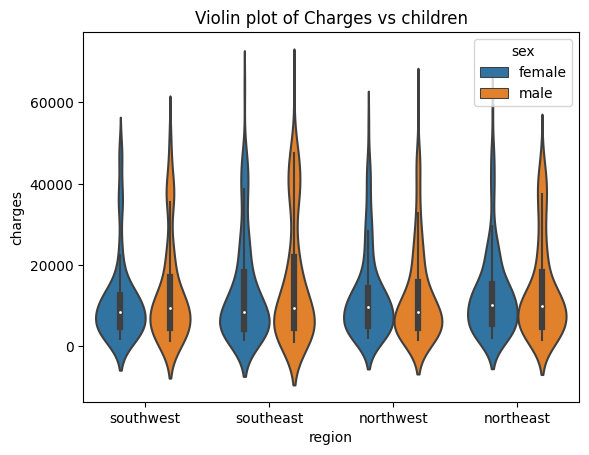

In [14]:
g = sns.violinplot(x="region", y="charges", hue='sex', data=med_df)
g.set(title="Violin plot of Charges vs children")

[Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')]

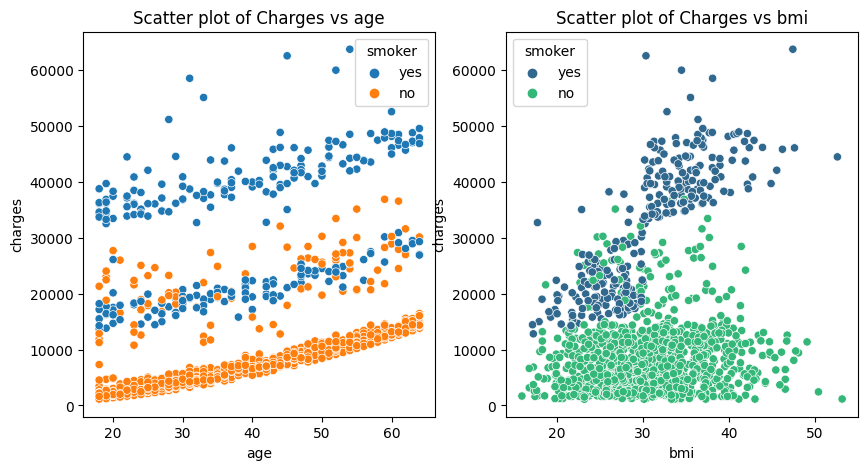

In [15]:
fig, ax = plt.subplots(1,2)

g = sns.scatterplot(x="age", y='charges', data=med_df, hue='smoker', ax=ax[0])
g.set(title="Scatter plot of Charges vs age")
fig.set_size_inches([10,5])

f = sns.scatterplot(x="bmi", y='charges', data=med_df, palette="viridis", hue="smoker", ax=ax[1])
f.set(title="Scatter plot of Charges vs bmi")